# Violent crimes in SF are most likely to happen in SOMA on weekends

#### 1. Which PdDistrict has most crime?
Figure 1 shows the number of crimes reported in Summer 2014 per Police district.
The police district with the largest number of crimes is the Southern district which serves the SOMA (South Of MArket) neighborhood.

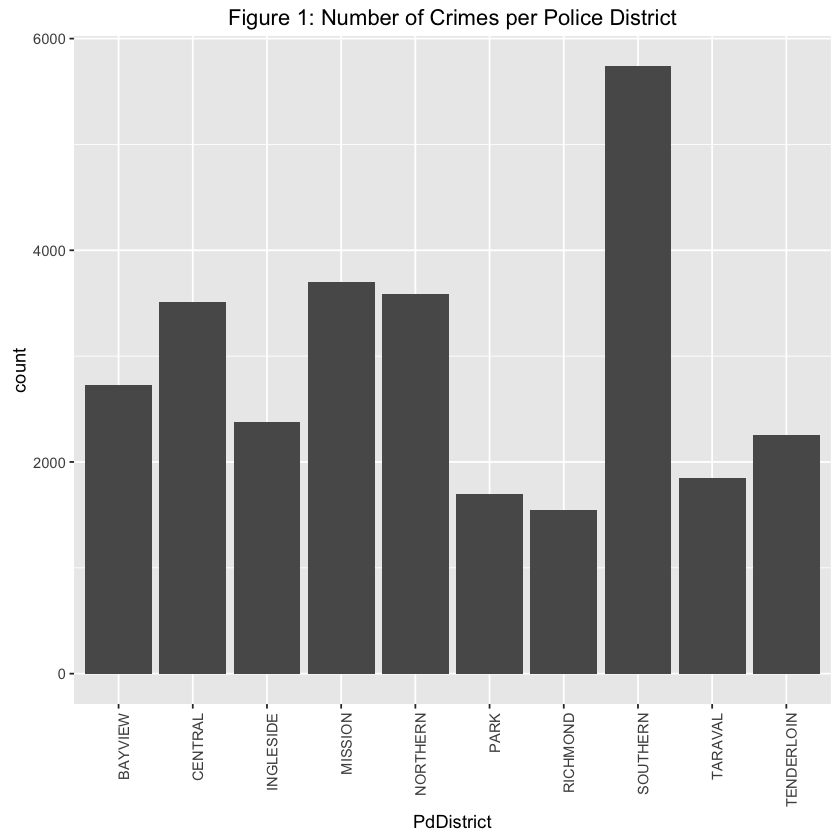

In [13]:
data = read.csv("sanfrancisco_incidents_summer_2014.csv")
library(ggplot2)

#PD district vs number of crimes
p <- ggplot(data,aes(PdDistrict)) + ggtitle("Figure 1: Number of Crimes per Police District")
p <- p + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
show(p)

#### 2. Which violent crimes are most common?
Figure 2 shows the number of crimes per category. The most common crime overall is larceny/theft. The most common violent crime is assault.

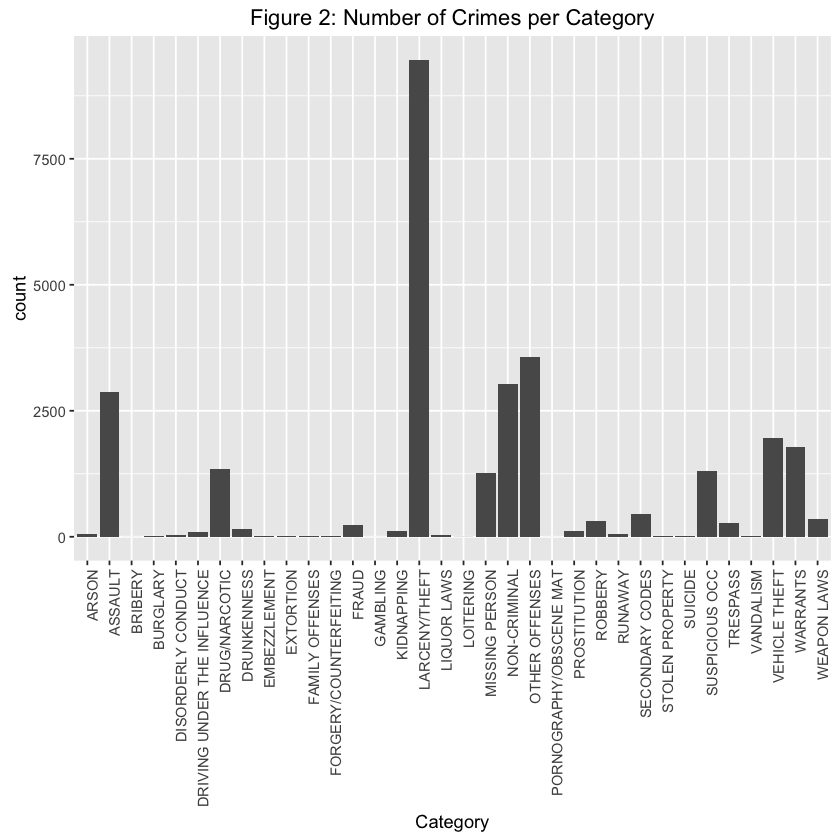

In [14]:
#Number of crimes per category
categories <- ggplot(data,aes(Category)) + ggtitle("Figure 2: Number of Crimes per Category")
categories <- categories + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
show(categories)

#### 3. Is Southern the district with most assaults?
Figure 3 shows the number of assaults per police district. The data shows a similar trend of the overall number of crimes. The Southern district remains the ditrict with the largest number of assaults. Interestingly, Bayview which was the 5th police district in terms of overall number of crimes is 3rd in terms of number of assaults.

However, using the police district as a proxy for neighborhoods may be a bit tricky. Some police districts may cover larger areas than other. Figure 4 shows a map of assaults in San Francisco. Each dot represents an assault and the color of the dot represents the corresponding police district. The map shows some insights which were not previously apparent. For instance, Tenderlion (a small area) has a rather high concentration of assaults and Richmond, a much larger area, has a much smaller concentration of assaults. Though, in any case, the map still shows that Mission, Central, Northern, and Southern districts are clearly leading in the concentration of assaults.

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=San+Francisco&zoom=12&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Francisco&sensor=false


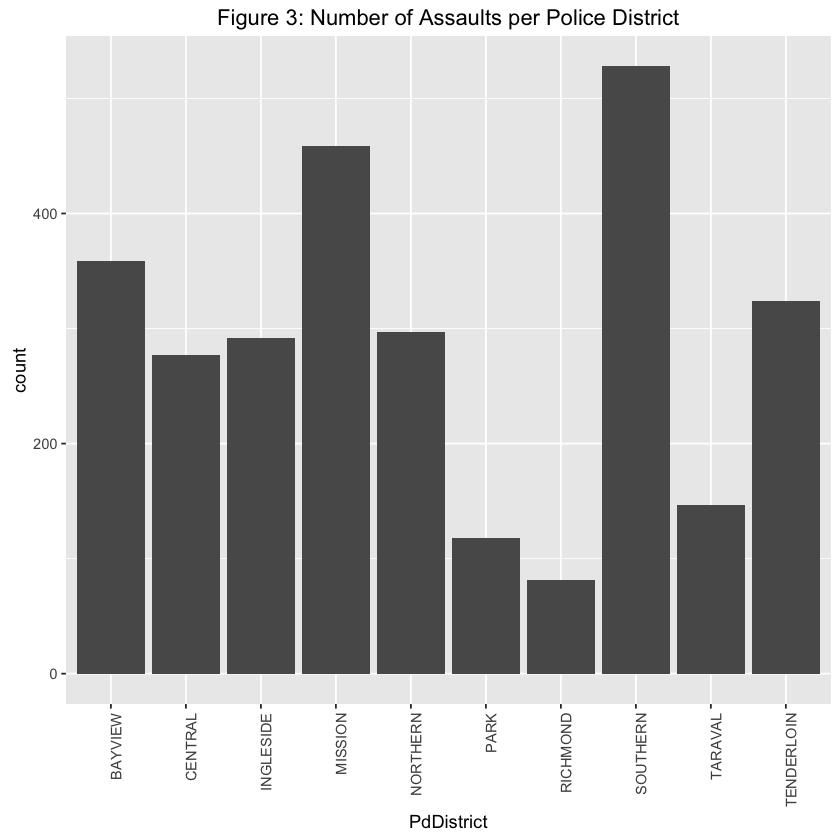

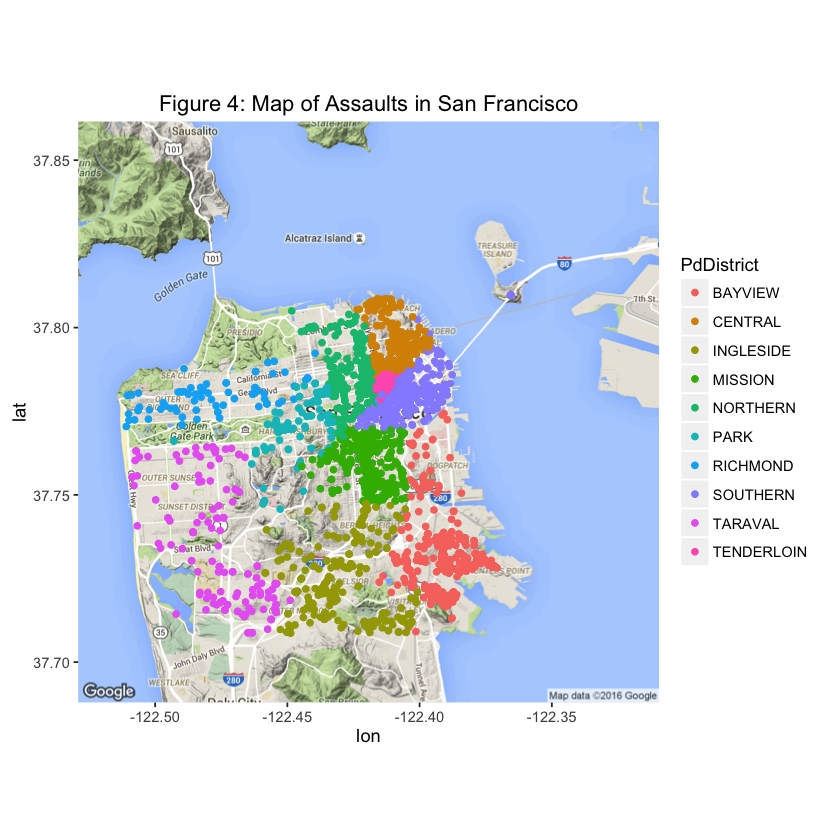

In [15]:
#Number of assaults per district
assault <- data[data$Category == "ASSAULT",]
passault <- ggplot(assault,aes(PdDistrict)) + ggtitle("Figure 3: Number of Assaults per Police District")
passault <- passault + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
show(passault)

library(ggmap)
#Assaults on map
map <- get_map(location = 'San Francisco', zoom=12)
mapPoints <- ggmap(map) +  geom_point(aes(x = X, y = Y, colour = PdDistrict), data=assault)
mapPoints <- mapPoints + ggtitle("Figure 4: Map of Assaults in San Francisco")
mapPoints

#### . Which days of the week have most assaults?
Figure 5 shows the number of assaults per day of the week over all of San Francisco. The figure shows that assaults are more likely to occur on Friday or weekends.


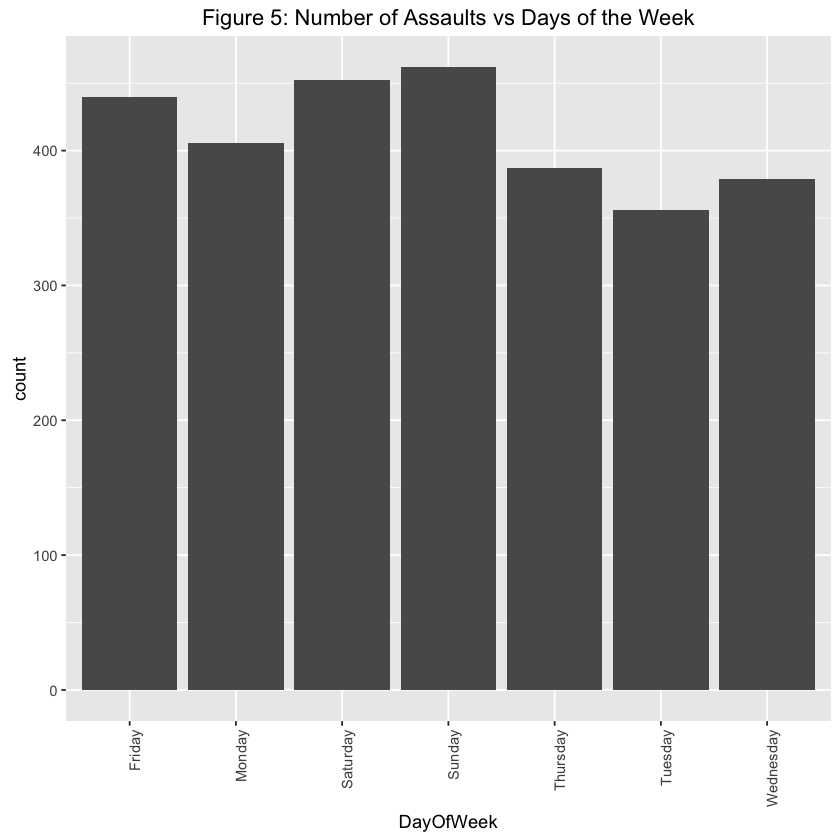

In [16]:
#Number of assaults vs DayOfWeek
pDay <- ggplot(assault,aes(DayOfWeek)) + ggtitle("Figure 5: Number of Assaults vs Days of the Week")
pDay <- pDay + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
show(pDay)

#### 5. Does this apply to SOMA?
Figure 6 shows the number of assaults per day of the week specifically for the southern police district. The plot shows that the same trend applies to this district; i.e., assaults are more likely on weekends (+Friday).

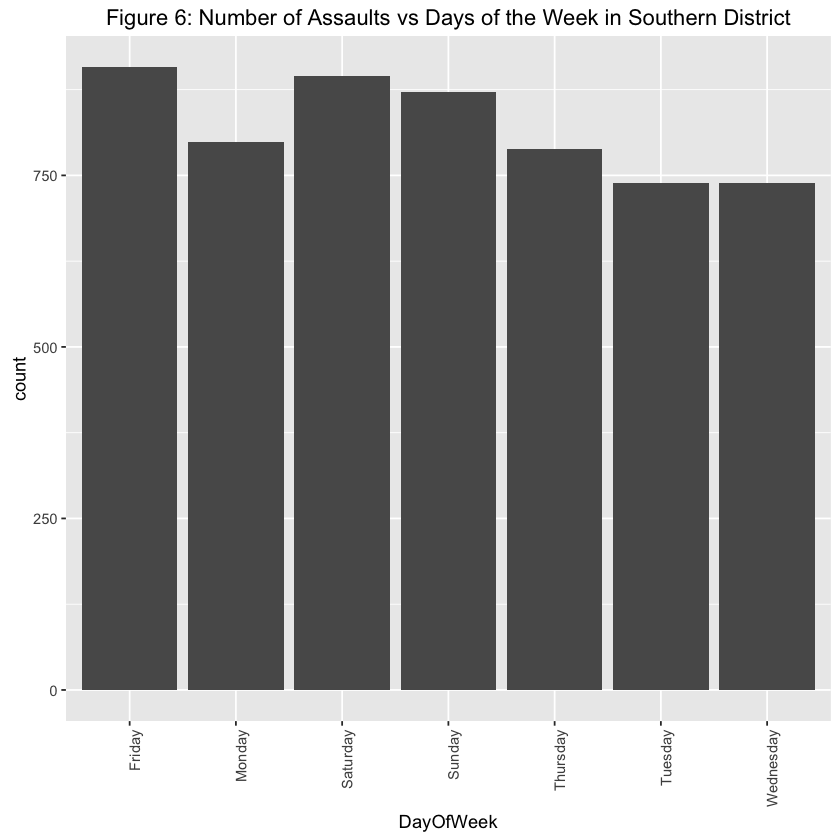

In [17]:
#Number of assaults in Southern PdDistrict vs DayOfWeek
assault_southern <- data[data$PdDistrict == "SOUTHERN",]
pDaySouth <- ggplot(assault_southern,aes(DayOfWeek)) + ggtitle("Figure 6: Number of Assaults vs Days of the Week in Southern District")
pDaySouth <- pDaySouth + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
show(pDaySouth)